# MAI612 Natural Language Processing with Deep Learning Homework 1 

##### Done By: Abdulrahman Al Muaitah 
##### University ID: 202110856


---


Introduction:  
This homework is divided into two main tasks, the first is creating Word2Vec and Doc2Vec word embeddings for Arabic wiki dump 2018, I have opted to go with the latest version of the Arabic wiki dump issued in 1st of September 2022.  
In the second task, I will create Word2Vec and Doc2Vec embeddings for a subset of the data in the English UN Corpus and the Arabic UN Corpus datasets.  
Attached at the bottom of the Jupyter Notebook is a chart showing the performance of different configurations I have used for training the gensim Word2Vec and Doc2Vec models 

## Task 1: Installing packages and importing libraries

In here I'm installing the pyarabic python package through pip and importing the libraries that will be used, for intuitivity the Arabic wiki dump is stored on Google Drive, and I'm copying it to the Google Colab runtime, then the data is uncompressed for the preprocessing stage.  
The size of the uncompressed arabic wiki dump is around 10GBs 

In [ ]:
!pip install pyarabic

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import gensim as gs
import pandas as pd

import pyarabic.araby as araby
import pyarabic.number as number

import re

import xml.etree.ElementTree as etree
import codecs
import csv
import time
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!cp /content/drive/MyDrive/MSc\ Natural\ Language\ Processing\ Colab\ Files\ /arwiki-20220901-pages-articles-multistream.xml.bz2 /content

In [ ]:
!bzip2 -dk /content/arwiki-20220901-pages-articles-multistream.xml.bz2

The functions below for transforming the data from the XML format to CSV as well as cleaning and tokenizing the Arabic text have been taken from Mohammed Ali Habib's GitHub project on Arabic Text Recommender System.  
https://github.com/MohamedAliHabib/easyLearn-Arabic-Text-Recommender-System

In [ ]:
%%time
PATH_WIKI_XML = '/content/'
FILENAME_WIKI = 'arwiki-20220901-pages-articles-multistream.xml'
FILENAME_ARTICLES = 'articles.csv'
FILENAME_REDIRECT = 'articles_redirect.csv'
FILENAME_TEMPLATE = 'articles_template.csv'
ENCODING = "utf-16"


# Nicely formatted time string
def hms_string(sec_elapsed):
    h = int(sec_elapsed / (60 * 60))
    m = int((sec_elapsed % (60 * 60)) / 60)
    s = sec_elapsed % 60
    return "{}:{:>02}:{:>05.2f}".format(h, m, s)


def strip_tag_name(t):
    t = elem.tag
    idx = k = t.rfind("}")
    if idx != -1:
        t = t[idx + 1:]
    return t


pathWikiXML = os.path.join(PATH_WIKI_XML, FILENAME_WIKI)
pathArticles = os.path.join(PATH_WIKI_XML, FILENAME_ARTICLES)
pathArticlesRedirect = os.path.join(PATH_WIKI_XML, FILENAME_REDIRECT)
pathTemplateRedirect = os.path.join(PATH_WIKI_XML, FILENAME_TEMPLATE)

totalCount = 0
articleCount = 0
redirectCount = 0
templateCount = 0
title = None
text = None
start_time = time.time()

with codecs.open(pathArticles, "w", ENCODING) as articlesFH, \
        codecs.open(pathArticlesRedirect, "w", ENCODING) as redirectFH, \
        codecs.open(pathTemplateRedirect, "w", ENCODING) as templateFH:
    articlesWriter = csv.writer(articlesFH, quoting=csv.QUOTE_MINIMAL)
    redirectWriter = csv.writer(redirectFH, quoting=csv.QUOTE_MINIMAL)
    templateWriter = csv.writer(templateFH, quoting=csv.QUOTE_MINIMAL)

    articlesWriter.writerow(['id', 'title', 'redirect', 'text'])
    redirectWriter.writerow(['id', 'title', 'redirect', 'text'])
    templateWriter.writerow(['id', 'title', 'text'])

    for event, elem in etree.iterparse(pathWikiXML, events=('start', 'end')):
        tname = strip_tag_name(elem.tag)

        if event == 'start':
            if tname == 'page':
                title = ''
                id = -1
                redirect = ''
                inrevision = False
                ns = 0
            elif tname == 'revision':
                # Do not pick up on revision id's
                inrevision = True
        else:
            if tname == 'title':
                title = elem.text
            elif tname == 'id' and not inrevision:
                id = int(elem.text)
            elif tname == 'redirect':
                redirect = elem.attrib['title']
            elif tname == 'ns':
                ns = int(elem.text)
            elif tname == 'text':
                text = elem.text
            elif tname == 'page':
                totalCount += 1

                if ns == 10:
                    templateCount += 1
                    templateWriter.writerow([id, title, text])
                elif len(redirect) > 0:
                    articleCount += 1
                    articlesWriter.writerow([id, title, redirect, text])
                else:
                    redirectCount += 1
                    redirectWriter.writerow([id, title, redirect, text])

                # if totalCount > 100000:
                #  break

                if totalCount > 1 and (totalCount % 100000) == 0:
                    print("{:,}".format(totalCount))

            elem.clear()

elapsed_time = time.time() - start_time

print("Total pages: {:,}".format(totalCount))
print("Template pages: {:,}".format(templateCount))
print("Article pages: {:,}".format(articleCount))
print("Redirect pages: {:,}".format(redirectCount))
print("Elapsed time: {}".format(hms_string(elapsed_time)))

100,000
200,000
300,000
400,000
500,000
600,000
700,000
800,000
900,000
1,000,000
1,100,000
1,200,000
1,300,000
1,400,000
1,500,000
1,600,000
1,700,000
1,800,000
1,900,000
2,000,000
2,100,000
2,200,000
2,300,000
2,400,000
2,500,000
2,600,000
2,700,000
2,800,000
2,900,000
3,000,000
3,100,000
3,200,000
3,300,000
3,400,000
Total pages: 3,417,899
Template pages: 123,126
Article pages: 1,030,118
Redirect pages: 2,264,655
Elapsed time: 0:07:10.75
CPU times: user 6min 35s, sys: 24.8 s, total: 7min
Wall time: 7min 10s


In [ ]:
df = pd.read_csv("/content/articles_template.csv", encoding="utf-16")
df.head() 

,id,title,text
0,1516,قالب:المهام الحالية,[[ملف:Evolution-tasks.png|يسار]]\n\nفيما يلي ب...
1,1796,قالب:جنوب آسيا,{{شريط\n|اسم = جنوب آسيا\n|عنوان =[[قائمة الدو...
2,1797,قالب:جدول النظام الشمسي,{{شريط\n| اسم = جدول النظام الشمسي\n| عنوان =...
3,2139,قالب:SelectedArticles,#تحويل [[قالب:مقالة الصفحة الرئيسية المختارة]]...
4,2178,قالب:تقويم يناير,{{تقويم شهري مقابل|ميلادي|1}}<noinclude>\n[[تص...


In [ ]:
def remove_files(text):
    result = []
    regex = re.compile("\[.*?\]")
    temp_result = re.findall(regex, text)
    en_letters = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z'
             ,'A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Z','Y','Z']
    for string in temp_result:
        contains = any((c in string) for c in en_letters)
        if contains:
            result.append(string)
    for el in result:
        text = text.replace(el,' ')
    return text
def clean_some_chars(text):
    search = ["أ","إ","آ","ة","_","-","/",".","،"," و "," يا ",'"',"ـ","'","ى","\\",'\n', '\t','&quot;','?','؟','!'
              ,"[","]","{","}","*",":","#","$","€","£","~","<",">","/","|","'",",",'=','(',')','+','•',';','&','–','♦','%'
             ,'»','»','·']
    
    replace = ["ا","ا","ا","ه"," "," ","","",""," و"," يا","","","","ي","",' ', ' ',' ',' ',' ',' '
               ," "," "," "," "," "," "," "," "," "," "," "," "," "," "," "," "," ",' ',' ',' ',' ',' ',' ',' ',' ',' ',' '
              ,' ',' ',' ']
    
    text = text.replace('وو', 'و')
    text = text.replace('يي', 'ي')
    text = text.replace('اا', 'ا')
    text = text.replace('\'','')
    # removing numbers
    text = ''.join([i for i in text if not i.isdigit()])
    
    for i in range(0, len(search)):
        text = text.replace(search[i], replace[i])
    
    #trim    
    text = text.strip()

    return text
def clean_english_chars(text):
    search = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z'
             ,'A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Z','Y','Z']
    for i in range(0, len(search)):
        text = text.replace(search[i],' ')
    return text
def remove_unnecessary_spaces(text):
    return re.sub(' +',' ',text)
def remove_non_arabic_letters(text):
    
    '''
    ALEF_MADDA       = u'\u0622' 
    ALEF_HAMZA_ABOVE = u'\u0623' 
    WAW_HAMZA        = u'\u0624' 
    ALEF_HAMZA_BELOW = u'\u0625' 
    YEH_HAMZA        = u'\u0626' 
    ALEF             = u'\u0627' 
    BEH              = u'\u0628' 
    TEH_MARBUTA      = u'\u0629' 
    TEH              = u'\u062a' 
    THEH             = u'\u062b' 
    JEEM             = u'\u062c' 
    HAH              = u'\u062d' 
    KHAH             = u'\u062e' 
    DAL              = u'\u062f' 
    THAL             = u'\u0630' 
    REH              = u'\u0631' 
    ZAIN             = u'\u0632' 
    SEEN             = u'\u0633' 
    SHEEN            = u'\u0634' 
    SAD              = u'\u0635' 
    DAD              = u'\u0636' 
    TAH              = u'\u0637' 
    ZAH              = u'\u0638' 
    AIN              = u'\u0639' 
    GHAIN            = u'\u063a' 
    TATWEEL          = u'\u0640' 
    FEH              = u'\u0641' 
    QAF              = u'\u0642' 
    KAF              = u'\u0643' 
    LAM              = u'\u0644' 
    MEEM             = u'\u0645' 
    NOON             = u'\u0646' 
    HEH              = u'\u0647' 
    WAW              = u'\u0648' 
    ALEF_MAKSURA     = u'\u0649' 
    YEH              = u'\u064a' 
    MADDA_ABOVE      = u'\u0653' 
    HAMZA_ABOVE      = u'\u0654' 
    HAMZA_BELOW      = u'\u0655' 
    LAM_ALEF                     = u'\ufefb' 
    LAM_ALEF_HAMZA_ABOVE         = u'\ufef7' 
    LAM_ALEF_HAMZA_BELOW         = u'\ufef9' 
    LAM_ALEF_MADDA_ABOVE         = u'\ufef5' 
    '''
    
    regex = re.compile(r'[\u0622\u0623\u0624\u0625\u0626\u0627\u0628\u0629\u062a\u062b\u062c\u062d\u062e\u062f\u0630\u0631\u0632\u0633\u0634\u0635\u0636\u0637\u0638\u0639\u063a\u0640\u0641\u0642\u0643\u0644\u0645\u0646\u0647\u0648\u0649\u064a\u0653\u0654\u0655\ufefb\ufef7\ufef9\ufef5]')
    # removing Arabic letters from the text and storing the result in the varialbe: unwanted_str .
    unwanted_str = regex.sub(' ',text)
    # Creating a list containing all of the unwanted characters, letters and symbols.
    unwanted_list_of_strs = list(unwanted_str.replace(" ", ""))
    # Cleaning the unwanted list of characters out of the text
    for i in range(0, len(unwanted_list_of_strs)):
        text = text.replace(unwanted_list_of_strs[i], " ")
    
    text = remove_unnecessary_spaces(text)
    
    return text
def concatenate_list_into_string(lis_strs):
    result = ""
    for el in lis_strs:
        result += " " + el
    return result
def remove_single_letters(text):
    words = text.split(' ')
    waw = 'و'
    for word in words:
        if len(word.strip()) == 1:
            if word != waw:
                words.remove(word)
    text = concatenate_list_into_string(words)
    return text


In [ ]:
def clean_text(text):
    # removing files
    text = remove_files(text)
    # removing some unuseful chars
    text = clean_some_chars(text)
    # removing english chars
    text = clean_english_chars(text)
    # removing tashkeel
    text = araby.strip_tashkeel(text)
    # removing longation
    text = araby.strip_tatweel(text)
    # removing unwanted spaces
    text = remove_unnecessary_spaces(text)
    # removing non-arabic characters
    text = remove_non_arabic_letters(text)
    # removing single unwanted letters
    text = remove_single_letters(text)
    # returning result
    return text    

In [ ]:
df.dropna()
df['text'] = df['text'].astype(str) 
df['text']

0         [[ملف:Evolution-tasks.png|يسار]]\n\nفيما يلي ب...
1         {{شريط\n|اسم = جنوب آسيا\n|عنوان =[[قائمة الدو...
2         {{شريط\n| اسم =  جدول النظام الشمسي\n| عنوان =...
3         #تحويل [[قالب:مقالة الصفحة الرئيسية المختارة]]...
4         {{تقويم شهري مقابل|ميلادي|1}}<noinclude>\n[[تص...
                                ...                        
123121    {{صورة صفحة رئيسية|Windmills D1-D4 (Thornton B...
123122    {{صورة صفحة رئيسية|Worker of Korea Party Monum...
123123    {{صورة صفحة رئيسية|Wormian bones.svg|[[عظام ور...
123124    {{#invoke:Sidebar|collapsible\n| class = plain...
123125                  #تحويل [[قالب:علم الأدلة الجنائية]]
Name: text, Length: 123126, dtype: object

In [ ]:
#Cleaning all the data 
df['text'] = df['text'].apply(clean_text) 
df.head(20)

,id,title,text
0,1516,قالب:المهام الحالية,فيما يلي بعض المهام الحاليه التي قد تساهم بها...
1,1796,قالب:جنوب آسيا,شريط اسم جنوب اسيا عنوان قائمه الدول دول ومقا...
2,1797,قالب:جدول النظام الشمسي,شريط اسم جدول النظام الشمسي عنوان امخ المجموع...
3,2139,قالب:SelectedArticles,تحويل قالب مقاله الصفحه الرئيسيه المختاره تحو...
4,2178,قالب:تقويم يناير,تقويم شهري مقابل ميلادي تصنيف قوالب تقويم اسم...
5,2179,قالب:تقويم فبراير,تقويم شهري مقابل ميلادي تصنيف قوالب تقويم اسم...
6,2183,قالب:رؤساء الحكومة الإسرائيلية,شريط اسم رؤسا الحكومه الاسرائيليه عنوان رئيس ...
7,2319,قالب:تقويم مايو,تقويم شهري مقابل ميلادي تصنيف قوالب تقويم اسم...
8,2373,قالب:تقويم يونيو,تقويم شهري مقابل ميلادي تصنيف قوالب تقويم اسم...
9,2375,قالب:تقويم أبريل,تقويم شهري مقابل ميلادي تصنيف قوالب تقويم اسم...


In [ ]:
df.shape

(123126, 3)

## Task 2: Creating a word2vec skipgram model 
After the preprocessing stage, the data needs to be tokenized (tokenization means that the paragraphs/sentences will be split into smaller groups and assigned some meaning) simply put, it will split the sentences to a list of words. 


In [ ]:
import pandas as pd 
import gensim as gs 
import multiprocessing 
from gensim.models.word2vec import Word2Vec 

In [ ]:
#First step for creating the word2vec model is to tokenize the input 
df.head(5) 


,id,title,text
0,1516,قالب:المهام الحالية,فيما يلي بعض المهام الحاليه التي قد تساهم بها...
1,1796,قالب:جنوب آسيا,شريط اسم جنوب اسيا عنوان قائمه الدول دول ومقا...
2,1797,قالب:جدول النظام الشمسي,شريط اسم جدول النظام الشمسي عنوان امخ المجموع...
3,2139,قالب:SelectedArticles,تحويل قالب مقاله الصفحه الرئيسيه المختاره تحو...
4,2178,قالب:تقويم يناير,تقويم شهري مقابل ميلادي تصنيف قوالب تقويم اسم...


In [ ]:
#Tokenizing 
df['text'] = df['text'].str.split() 
df['text']

0         [فيما, يلي, بعض, المهام, الحاليه, التي, قد, تس...
1         [شريط, اسم, جنوب, اسيا, عنوان, قائمه, الدول, د...
2         [شريط, اسم, جدول, النظام, الشمسي, عنوان, امخ, ...
3         [تحويل, قالب, مقاله, الصفحه, الرئيسيه, المختار...
4         [تقويم, شهري, مقابل, ميلادي, تصنيف, قوالب, تقو...
                                ...                        
123121    [صوره, صفحه, رئيسيه, عنفه, رياح, عنفات, رياحيه...
123122    [صوره, صفحه, رئيسيه, تمثال, حزب, العمال, ويظهر...
123123    [صوره, صفحه, رئيسيه, عظام, ورميانيه, العظام, ا...
123124    [جز, من, علم, الادله, الجنائيه, سلسله, علم, ال...
123125                 [تحويل, قالب, علم, الادله, الجنائيه]
Name: text, Length: 123126, dtype: object

In [ ]:
#Feeding the data into a gensim phraser to detect any common phrases (not sure how this is going to work well with Arabic)
phrases = gs.models.phrases.Phrases(df['text'].tolist()) 
phraser = gs.models.phrases.Phraser(phrases) 
trained_phrased = phraser[df['text'].tolist()]

In [ ]:
multiprocessing.cpu_count() 

4

In this step we are creating the word2vec model, the sg parameter controls the type of word2vec type we would like to use. sg=1 for skipgram and sg=0 for CBOW.  
the workers parameter specifies the number of worker threads that would be used in the training period, I'm using Google Colab Pro with the High RAM runtime, the number of threads that are provided are 4.

In [ ]:
%%time 
#Creating the word2vec model, sg=1 for skipgram and sg=0 for CBOW 
w2vecModel = Word2Vec(sentences=trained_phrased,sg=1, workers=4)

CPU times: user 8min 35s, sys: 820 ms, total: 8min 36s
Wall time: 3min 10s


In [ ]:
w2vecModel.save('w2vec_Model')

In [ ]:
#viewing the vocabulary 
words = list(w2vecModel.wv.vocab) 
print(len(words))

125446


In [ ]:
print(words)

['فيما_يلي', 'بعض', 'المهام', 'الحاليه', 'التي_قد', 'تساهم', 'بها', 'تنميه', 'مقالات', 'البذره', 'اختر', 'المقاله', 'الذي', 'مناسبه', 'لك', 'والذي', 'تنوي', 'وتحسينها', 'من', 'القوائم', 'التاليه', 'تصنيف', 'بذره', 'رياضيات', 'علوم', 'تاريخ', 'جغرافيا', 'بذره_اعلام', 'رياضه', 'ثقافه', 'سياسه', 'فلسفه', 'انشا_صفحات', 'جديده', 'من_الممكن', 'ان', 'بذلك', 'عن_طريق', 'انشا_مقاله', 'عن', 'اي', 'المواضيع', 'المذكوره', 'في', 'صفحه', 'ويكيبيديا', 'مقالات_مقترحه', 'المقترحه', 'تحويل', 'يمكنك_ايضا', 'المشاركه', 'تحسين', 'الموسوعه', 'شائعه', 'لكنها', 'لا', 'تخضع_ويكيبيديا', 'عناوين_المقالات', 'لسياسه', 'تسميه_المقالات', 'اضافه', 'عنوان', 'المقال', 'المراد', 'التحويل', 'اليه', 'تنقيح', 'المقالات_الموجوده', 'ابحث_عن', 'تري', 'انه', 'بحاجه', 'الي', 'واضف', 'عليه', 'المعلومات', 'او', 'المحتويات', 'الجديده', 'وضع', 'وصلات_الانترويكي', 'هناك', 'كثير', 'غير', 'موصوله', 'نفسها', 'المنشوره', 'علي', 'باللغات', 'الاخري', 'يمكنك', 'الاضافه', 'بوضع', 'الوصلات', 'اللازمه', 'ترجمه', 'توجد', 'الكثير_من', 'المقالات

In [ ]:
w2vecModel.wv['بحر']

array([-1.35826552e+00, -4.48461026e-01, -5.19799665e-02,  2.00188443e-01,
        2.46286944e-01,  9.04618204e-01,  9.10425425e-01, -2.67628044e-01,
        1.90181434e-01,  1.31630786e-02,  4.19177443e-01,  7.71398067e-01,
        2.37170160e-01,  1.94728836e-01,  9.07496274e-01,  2.36718684e-01,
        8.82417038e-02, -6.89216733e-01,  2.42379442e-01,  1.41852275e-01,
       -9.50301737e-02,  4.68713529e-02,  4.43232618e-03, -9.40632582e-01,
        1.70421362e-01,  1.98901281e-01, -2.55452037e-01,  2.27813959e-01,
       -6.72035456e-01,  7.40927458e-01,  5.16053736e-01,  4.77444977e-01,
        3.88696462e-01, -6.67896211e-01, -1.42673969e-01, -3.61840963e-01,
        6.97510168e-02,  6.50287569e-01, -1.11645147e-01, -6.49775803e-01,
       -6.06859028e-01,  2.99987525e-01,  4.30005074e-01,  1.02194750e+00,
        2.92600781e-01, -2.53543407e-01, -8.72448012e-02, -3.52687180e-01,
        1.17749882e+00, -1.06717087e-01, -7.05667734e-01,  4.61880952e-01,
        2.52789468e-01, -

Here, I'm testing the word2vec model by seeing the most similar words to حب

In [ ]:
w2vecModel.wv.most_similar('حب')

[('فيلم_ليله', 0.8679561614990234),
 ('فيلم_حب', 0.8675719499588013),
 ('دموع', 0.8634688854217529),
 ('الظلام_فيلم', 0.8583993315696716),
 ('الحب_فيلم', 0.8426622152328491),
 ('عريس', 0.841347336769104),
 ('فيلم_انا', 0.8410235643386841),
 ('زوجتي', 0.8379895687103271),
 ('مراتي', 0.8379802703857422),
 ('ريا_وسكينه', 0.8376201391220093)]

The code below fetches the 10 most similar words and their word vectors for 6 random words I've selected. 
We can see that the output array is 60x100. (60 words, each word is representing by a 100-value word vector representation) 

In [ ]:
import numpy as np 
simList = ['حب','بحر','امير','ظل','جميل','كمين']
wordList = [] 
for i in simList: 
  for j in w2vecModel.wv.most_similar(i): 
    wordList.append(j[0])
print(wordList)

simVectorList = [] 
for i in wordList: 
  simVectorList.append(w2vecModel.wv[i]) 
simVectorArr = np.array(simVectorList) 
print(simVectorArr.shape)

['فيلم_ليله', 'فيلم_حب', 'دموع', 'الظلام_فيلم', 'الحب_فيلم', 'عريس', 'فيلم_انا', 'زوجتي', 'مراتي', 'ريا_وسكينه', 'المجتث', 'المقتضب', 'المتوافر', 'المنسرد', 'المتئد', 'الهزج', 'مضيق', 'الرجز', 'اموندسن', 'ارافورا', 'الامير', 'وصي', 'عباس_هويدا', 'هويدا', 'ماماي', 'اكيشينو', 'صغير_بالوكاله', 'سمو', 'ميرزا', 'البير_الثاني', 'شكلت', 'تحول', 'خلافه_العرش', 'تعيد', 'الظل', 'الايقونات', 'وقوع', 'اقصي_اليسار', 'الحروب_الصليبيه', 'الفوهرر', 'لبني', 'بهيج', 'اشعث', 'طوقان', 'الخشن', 'طوبال', 'اسمر', 'تركستاني', 'محب', 'كشميري', 'نوفمبر_هجوم', 'يوليو_هجوم', 'مخيم_اليرموك', 'معركه_الرمادي', 'ديسمبر_هجوم', 'عكاشات', 'سد_تشرين', 'تفجيرا', 'فبراير_هجوم', 'الشيخ_مسكين']
(60, 100)


To be able to plot the code in two dimensions, I'm going to reduce the number of dimensions of the previous array from 100 dimensions to 2 dimensions using PCA. 

In [ ]:
from sklearn.decomposition import PCA 
import numpy as np  
import matplotlib.pyplot as plt 

In [ ]:
pca = PCA(n_components=2) 
result = pca.fit_transform(simVectorArr)

In [ ]:
result

array([[ 1.5058507 ,  1.5329752 ],
       [ 1.0261099 ,  1.3109322 ],
       [ 0.87023574,  1.4142574 ],
       [ 0.83863556,  0.93159616],
       [ 2.1696155 ,  2.0687573 ],
       [ 0.93258435,  1.1144822 ],
       [ 1.4365442 ,  1.9670156 ],
       [ 0.9694507 ,  0.76209617],
       [ 0.9473525 ,  0.8787203 ],
       [ 0.6238677 ,  0.8301081 ],
       [-0.10705429, -0.10748231],
       [-0.03995407, -0.08479474],
       [-0.02734469, -0.07805057],
       [-0.07061816, -0.17456771],
       [-0.03413521, -0.15089285],
       [-0.0585997 , -0.14696458],
       [ 0.53072613, -0.86769116],
       [-0.13558394, -0.02721835],
       [-0.1043663 , -0.36584413],
       [-0.16299263, -0.19277704],
       [-0.22230305, -0.15677817],
       [-0.37175795, -0.67548174],
       [-0.49470946, -0.5746522 ],
       [-0.55654794, -0.46307996],
       [-0.36103112, -0.29678774],
       [-0.21268728, -0.2930507 ],
       [-0.66730964, -0.19112769],
       [-0.10289458, -0.49112886],
       [-1.4890778 ,

The annotations in the Arabic language are not supported that well in Matplotlib, but the performance of the word2vec model is decent at best, there doesn't seem to be a good enough pattern to determine the similarities between the words from this graph.

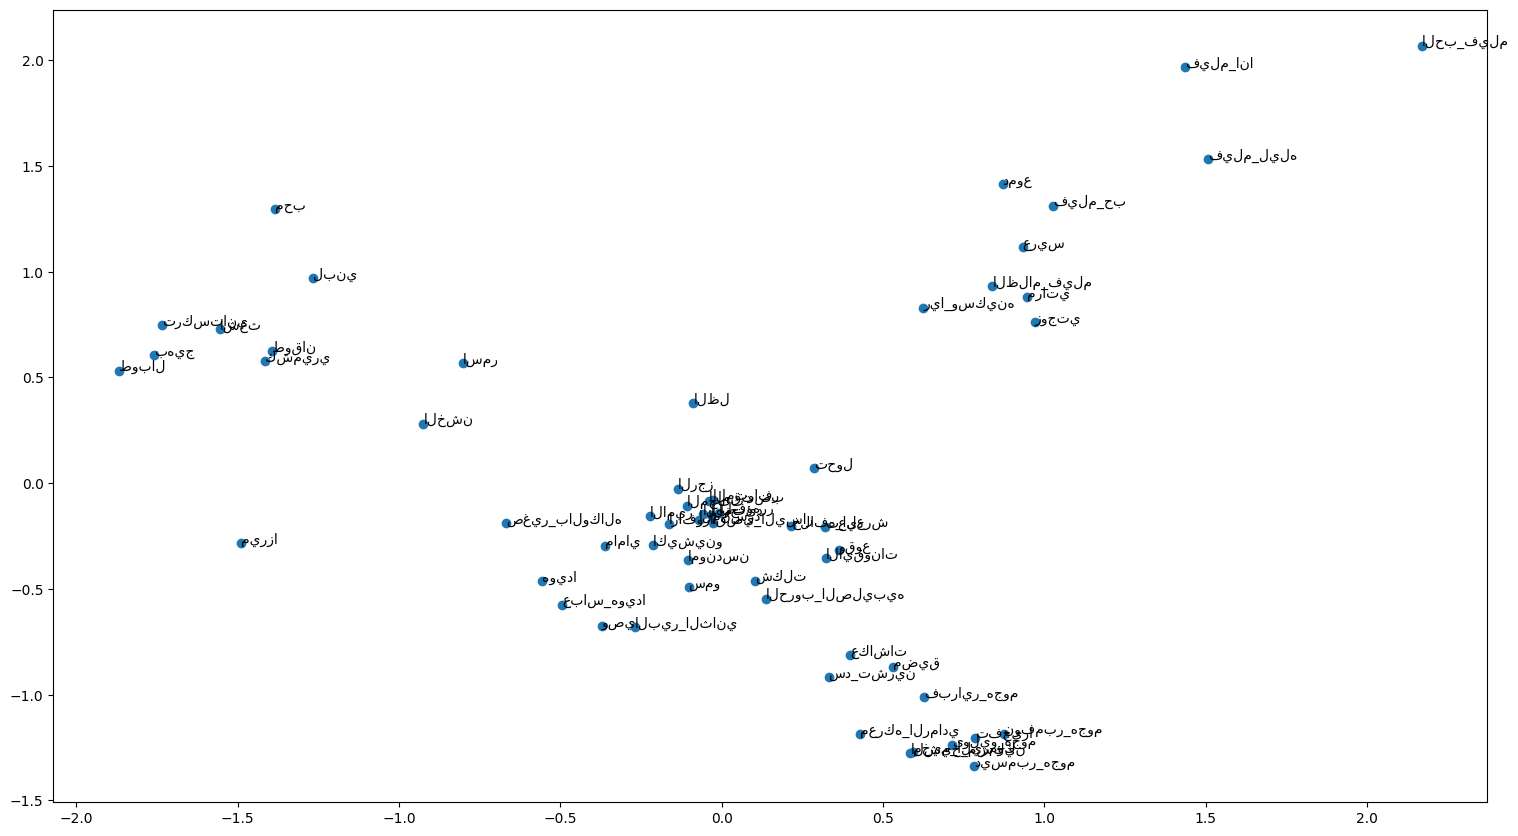

In [ ]:
fig = plt.gcf() 
fig.set_size_inches(18.5,10.5, forward=True) 
fig.set_dpi(100)
plt.scatter(result[:,0],result[:,1]) 
for i, word in enumerate(wordList): 
  plt.annotate(word,xy=(result[i,0],result[i,1])) 
plt.show() 

In this example I'm trying to distinguish the odd word from a triplet of words, if the words are distinct enough, it seems to be able to capture the odd word out of them. 

In [ ]:
#odd word out, different implementation, 5 triplets of words 
print(w2vecModel.wv.doesnt_match(['حب', 'دموع', 'كمين']))
print(w2vecModel.wv.doesnt_match(['نار', 'ملك', 'امير']))
print(w2vecModel.wv.doesnt_match(['حب', 'دموع', 'ورق']))
print(w2vecModel.wv.doesnt_match(['نار', 'مياه', 'احمر']))
print(w2vecModel.wv.doesnt_match(['اسيا', 'افريقيا', 'جبال']))

كمين
نار
ورق
احمر
جبال


/usr/local/lib/python3.7/dist-packages/gensim/models/keyedvectors.py:895: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


In this example, I'm measuring the word similarity 

In [ ]:
#Measuring word similarity
print(w2vecModel.wv.similarity('المسلمين','المصلين'))
print(w2vecModel.wv.similarity('الدين','النار'))
print(w2vecModel.wv.similarity('لطيف','المياه'))
print(w2vecModel.wv.similarity('امير','ملك'))
print(w2vecModel.wv.similarity('ذكر','انثي'))

0.6923171
0.17905253
0.26080093
0.5461875
0.73363703


In this example, I'm testing the models ability in understanding the different analogies, but it doesn't seem to produce good results when it comes to this specific task. 

In [ ]:
#Testing the different analogies (The answers here do not make sense to me)
print(w2vecModel.wv.most_similar(positive=["المسلمين", "المصلين"], negative=["ذكر"], topn=3))
print(w2vecModel.wv.most_similar(positive=["ذكر", "انثي"], negative=["ملك"], topn=3))
print(w2vecModel.wv.most_similar(positive=["ذكر", "كلب"], negative=["انثي"], topn=3))

[('والاسلاميه', 0.7711079120635986), ('الشيعيه', 0.7677006721496582), ('الايرانين', 0.7587183713912964)]
[('ذكر_انثي', 0.727037787437439), ('الشخص', 0.7007126212120056), ('بلوغ', 0.6948680877685547)]
[('الغطاس', 0.6457147598266602), ('ماعز', 0.6451073884963989), ('الراسي', 0.6434512138366699)]


## Task 3: The Doc2vec Model 

In the previous steps I've tested the performance of a Word2Vec model, in the following steps, I'm going to perform the same exact tests using a Doc2Vec model.  
While Word2Vec computes a feature vector for every word in the corpus, Doc2Vec computes a feature vector for every document in the corpus.

In [ ]:
import gensim 
import pandas as pd 
#Let's create the tagged document objects to prepare to train the model 
tagged_documents = [gensim.models.doc2vec.TaggedDocument(v,[i]) for i,v in enumerate(df['text'])]

In [ ]:
#Let's see the first document for example 
tagged_documents[0]

TaggedDocument(words=['فيما', 'يلي', 'بعض', 'المهام', 'الحاليه', 'التي', 'قد', 'تساهم', 'بها', 'تنميه', 'مقالات', 'البذره', 'اختر', 'المقاله', 'الذي', 'تراها', 'مناسبه', 'لك', 'والذي', 'تنوي', 'تنميتها', 'وتحسينها', 'من', 'القوائم', 'التاليه', 'تصنيف', 'بذره', 'بذره', 'تصنيف', 'بذره', 'رياضيات', 'تصنيف', 'بذره', 'علوم', 'بذره', 'علوم', 'تصنيف', 'بذره', 'تاريخ', 'بذره', 'تاريخ', 'تصنيف', 'بذره', 'جغرافيا', 'بذره', 'جغرافيا', 'تصنيف', 'بذره', 'اعلام', 'بذره', 'اعلام', 'تصنيف', 'بذره', 'رياضه', 'بذره', 'رياضه', 'تصنيف', 'بذره', 'ثقافه', 'تصنيف', 'بذره', 'سياسه', 'تصنيف', 'بذره', 'فلسفه', 'انشا', 'صفحات', 'جديده', 'من', 'الممكن', 'ان', 'تساهم', 'بذلك', 'عن', 'طريق', 'انشا', 'مقاله', 'عن', 'اي', 'من', 'المواضيع', 'المذكوره', 'في', 'صفحه', 'ويكيبيديا', 'مقالات', 'مقترحه', 'المواضيع', 'المقترحه', 'انشا', 'صفحات', 'تحويل', 'يمكنك', 'ايضا', 'المشاركه', 'في', 'تحسين', 'الموسوعه', 'عن', 'طريق', 'انشا', 'صفحات', 'تحويل', 'بعناوين', 'شائعه', 'لكنها', 'لا', 'تخضع', 'ويكيبيديا', 'عناوين', 'المقالات',

Creating and training the Doc2Vec model 

In [ ]:
%%time 
#Creating and training the doc2vec model 
d2v_model = gensim.models.Doc2Vec(tagged_documents, vector_size=100,window=5,min_count=2,workers=4) 

CPU times: user 4min 29s, sys: 21.8 s, total: 4min 50s
Wall time: 3min 1s


In [ ]:
d2v_model.save('d2v_model')

Performing the same exact tests that were performed in the Word2Vec model  

In [ ]:
d2v_model.wv['بحر']

array([-1.7787077 ,  0.329724  ,  1.1530752 , -0.6964993 , -0.10000283,
        1.5090175 ,  0.46984723, -0.84818155, -1.7338734 , -1.2953151 ,
        0.00963741, -0.8183238 , -1.2056407 ,  0.2371906 ,  0.55996776,
       -0.95093596,  0.7303088 , -0.98152256,  1.7391429 ,  1.7859395 ,
       -0.7589083 ,  2.0248356 ,  0.23807146,  0.05617411, -1.57185   ,
       -0.1801376 , -0.21297489, -1.265045  ,  1.2728808 , -1.3233372 ,
       -1.778351  ,  0.06752647, -1.2896783 ,  0.11415516, -1.3591001 ,
       -1.3152075 , -1.206055  ,  0.12529118, -0.26585406, -0.41495633,
        0.5595983 ,  1.6850168 , -0.43358067,  1.9358668 , -0.09216061,
       -0.42869607, -0.10205786, -0.33453122,  0.65233296, -0.41334504,
       -0.19886816, -1.8094403 ,  0.21139799, -0.8703039 , -0.5957132 ,
       -1.4026846 ,  0.89317805, -0.98126984, -2.3241358 , -0.49626523,
       -0.810442  , -1.9556845 , -0.43860927, -0.1947959 ,  0.40244788,
        0.19942263, -1.2654139 ,  0.9761205 ,  1.156809  , -1.01

In [ ]:
d2v_model.wv.most_similar('حب')

[('ليله', 0.8416222333908081),
 ('الرجل', 0.8252586126327515),
 ('الشيطان', 0.8221633434295654),
 ('الساحره', 0.8149364590644836),
 ('الحب', 0.8114956617355347),
 ('مسرحيه', 0.8091724514961243),
 ('حكايه', 0.8032659292221069),
 ('لغز', 0.7995696663856506),
 ('يوميات', 0.7944070100784302),
 ('حياتي', 0.7893722057342529)]

In [ ]:
import numpy as np 
simList = ['حب','بحر','امير','ظل','جميل','كمين']
wordList = [] 
for i in simList: 
  for j in d2v_model.wv.most_similar(i): 
    wordList.append(j[0])
print(wordList)

simVectorList = [] 
for i in wordList: 
  simVectorList.append(d2v_model.wv[i]) 
simVectorArr = np.array(simVectorList) 
print(simVectorArr.shape)

['ليله', 'الرجل', 'الشيطان', 'الساحره', 'الحب', 'مسرحيه', 'حكايه', 'لغز', 'يوميات', 'حياتي', 'ايجه', 'المتجمد', 'ارخبيل', 'لبحر', 'ارال', 'المانش', 'مضيق', 'المرجان', 'سالتون', 'كاموتس', 'اسقفيه', 'سعيود', 'دوق', 'هويدا', 'ورحله', 'فلندا', 'نابليون', 'فسترغوتلاند', 'داهر', 'المؤمنين', 'صدر', 'القوانين', 'مكافاه', 'الميلادي', 'المباني', 'تجدد', 'التحول', 'اصحاب', 'التلوث', 'منتصف', 'العظمه', 'المطوق', 'لبني', 'مرجان', 'الالشي', 'بقباقه', 'حداد', 'الجميل', 'زيتوني', 'فردوسي', 'عكاشات', 'رمانه', 'سنجار', 'الرستن', 'وقعه', 'القريتين', 'دابق', 'القلمون', 'نتساريم', 'نبع']
(60, 100)


In [ ]:
from sklearn.decomposition import PCA 
import numpy as np  
import matplotlib.pyplot as plt 

In [ ]:
pca = PCA(n_components=2) 
result = pca.fit_transform(simVectorArr)

In [ ]:
result

array([[ 6.0505743e+00, -3.4286162e-01],
       [ 7.0416422e+00, -1.4270602e-01],
       [ 1.9274164e+00, -1.9283092e-01],
       [-7.5319397e-01, -7.2962338e-01],
       [ 9.2394972e+00, -1.0904193e+00],
       [ 8.9816389e+00,  7.2832257e-01],
       [ 3.8836293e+00, -1.2674411e-01],
       [ 1.9064361e+00, -2.4634254e-01],
       [ 7.3414016e-01,  4.4576623e-02],
       [ 1.6260462e+00, -3.2382295e-01],
       [-1.3079274e+00, -1.3036111e-01],
       [-9.5375085e-01, -4.7287505e-02],
       [-2.1047063e+00,  4.4635597e-01],
       [-1.4470885e+00, -7.0908302e-01],
       [-8.8202357e-01, -4.0032387e-01],
       [-1.6355801e+00, -7.2472298e-01],
       [-1.7365831e+00,  8.2056659e-01],
       [-6.5617144e-01, -4.7803956e-01],
       [-1.6160067e+00, -7.3326057e-01],
       [-1.5835279e+00, -7.0220536e-01],
       [-1.6365321e+00,  1.1040112e+00],
       [-1.5942956e+00, -6.4200014e-01],
       [-1.8913852e-01,  1.3668694e+01],
       [-1.4308487e+00, -1.3787621e-01],
       [-1.52455

Doc2Vec seems to do a poorer job in clustering the different words as opposed to Word2Vec, I believe the issue might be from the default parameters I've chosen for Doc2Vec 

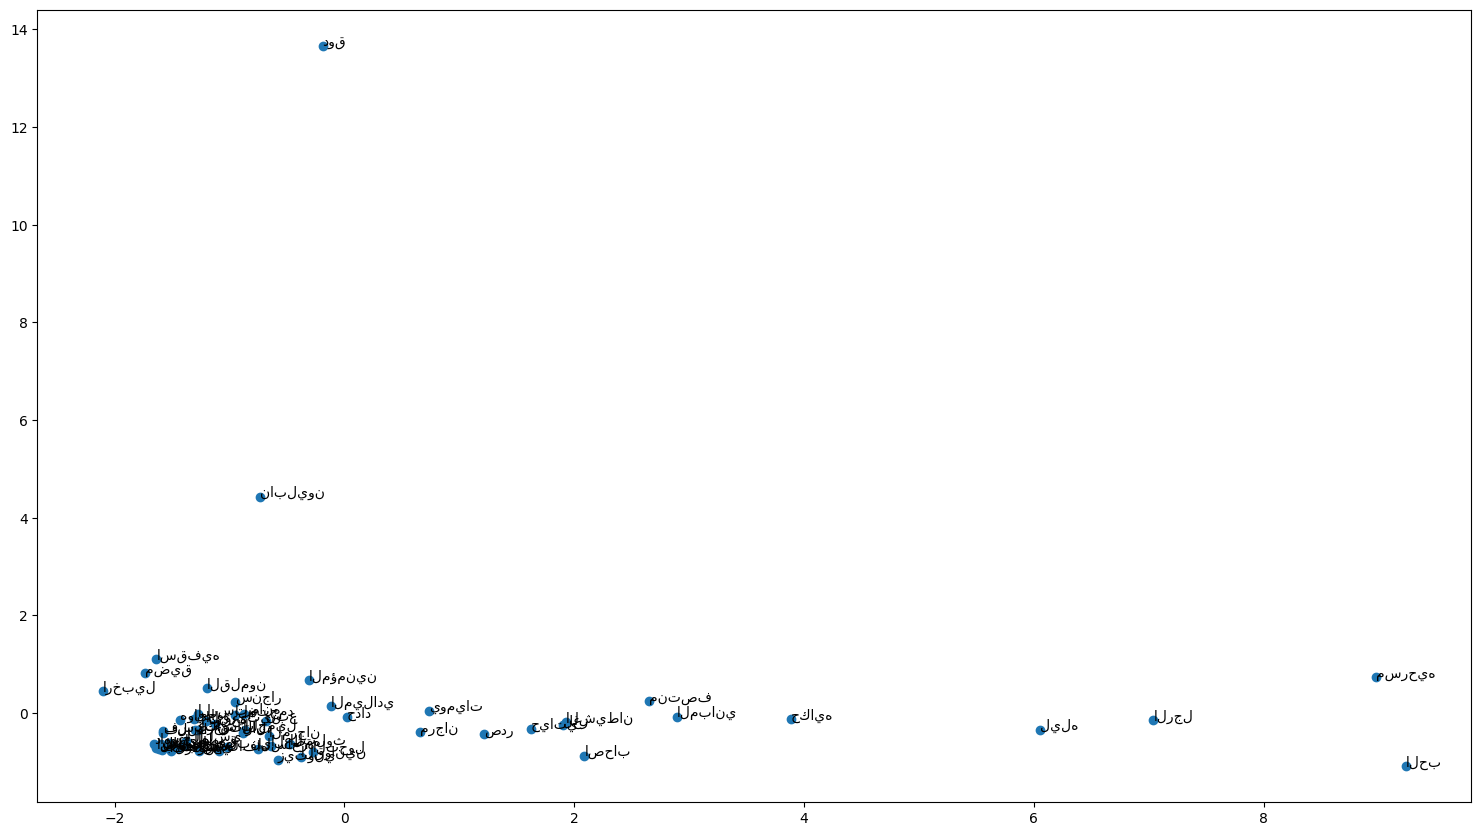

In [ ]:
fig = plt.gcf() 
fig.set_size_inches(18.5,10.5, forward=True) 
fig.set_dpi(100)
plt.scatter(result[:,0],result[:,1]) 
for i, word in enumerate(wordList): 
  plt.annotate(word,xy=(result[i,0],result[i,1])) 
plt.show() 

In [ ]:
#odd word out, different implementation, 5 triplets of words 
print(d2v_model.wv.doesnt_match(['حب', 'دموع', 'كمين']))
print(d2v_model.wv.doesnt_match(['نار', 'ملك', 'امير']))
print(d2v_model.wv.doesnt_match(['حب', 'دموع', 'ورق']))
print(d2v_model.wv.doesnt_match(['نار', 'مياه', 'احمر']))
print(d2v_model.wv.doesnt_match(['اسيا', 'افريقيا', 'جبال']))

كمين
نار
ورق
احمر
جبال


/usr/local/lib/python3.7/dist-packages/gensim/models/keyedvectors.py:895: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


In [ ]:
#Measuring word similarity
print(d2v_model.wv.similarity('المسلمين','المصلين'))
print(d2v_model.wv.similarity('الدين','النار'))
print(d2v_model.wv.similarity('لطيف','المياه'))
print(d2v_model.wv.similarity('امير','ملك'))
print(d2v_model.wv.similarity('ذكر','انثي'))

0.32543892
-0.047526635
0.017931884
0.6862946
0.71773005


In [ ]:
#Testing the different analogies (The answers here do not make sense to me)
print(d2v_model.wv.most_similar(positive=["المسلمين", "المصلين"], negative=["ذكر"], topn=3))
print(d2v_model.wv.most_similar(positive=["ذكر", "انثي"], negative=["ملك"], topn=3))
print(d2v_model.wv.most_similar(positive=["ذكر", "كلب"], negative=["انثي"], topn=3))

[('السيبه', 0.7664803266525269), ('عزيزيه', 0.7587075233459473), ('للاكلات', 0.7583450078964233)]
[('حديثا', 0.7131220698356628), ('تصحيح', 0.7120919227600098), ('الضروره', 0.7050729990005493)]
[('اسماعيليه', 0.6460247039794922), ('كريدم', 0.6320953965187073), ('الشجعان', 0.6186795234680176)]


## Task 4: UN Corpus Data 

In this task I'm training a Word2Vec and and Doc2Vec model on a subset of the UN Corpus data, the English UN Corpus is around 1.7GB in size, I will use a subset of around 230 MB, due to the time it takes to train the Word2Vec and Doc2Vec models. But as you will see in the results, both model perform extremely well. 

In this step I'm copying the original file of 1.7GB to the Google Colab runtime environment, and spliting the file, I will use the 230 MB file for training the models 

In [ ]:
#Copying the UN Corpus to the runtime environment 
!cp /content/drive/MyDrive/MSc\ Natural\ Language\ Processing\ Colab\ Files\ /UNv1.0.6way.en.txt /content/

In [ ]:
#The file is extremely huge and can't be kept in RAM, therefore I will split the text file in half
#and test the possibility of reading it inside of Colab 
#unCorpus = open("/content/UNv1.0.6way.en.txt","r") 
#uncorpusRead = unCorpus.read() 
#!wc -l /content/UNv1.0.6way.en.txt
!split /content/UNv1.0.6way.en.txt -l 10000000 #This will split the data into two files named xaa and xab, one of them will be around 1GB and the other around 230~250 MB, we will use the smaller of the two
#due to Google Colab processing limitation (especially RAM)

In the following step, I'm writing the text file and writing it into a csv file, after that I will perform tokenization on the data before feeding it for the gensim models.

In [ ]:
import pandas as pd 
readtxt = pd.read_csv(r'/content/xab',names=['text'],on_bad_lines='skip')
readtxt.to_csv('xab.csv',index=None)

In [ ]:
df = pd.read_csv('/content/xab.csv')
df

,text
0,:: The statement of financial performance (sta...
1,:: The statement of changes in net assets (sta...
2,:: The cash flow statement (statement IV) incl...
3,:: The statement on comparison of budget to ac...
4,:: Schedule B presents breakdown by donor of a...
...,...
1345882,:: Related report of the Advisory Committee on...
1345883,:: Strategic brief on resource mobilization as...
1345884,:: Meta-analysis of evaluations managed by UN-...
1345885,:: Corporate evaluation of the contribution of...


In [ ]:
df.dropna()
df['text'] = df['text'].astype(str) 
df['text']

0          :: The statement of financial performance (sta...
1          :: The statement of changes in net assets (sta...
2          :: The cash flow statement (statement IV) incl...
3          :: The statement on comparison of budget to ac...
4          :: Schedule B presents breakdown by donor of a...
                                 ...                        
1345882    :: Related report of the Advisory Committee on...
1345883    :: Strategic brief on resource mobilization as...
1345884    :: Meta-analysis of evaluations managed by UN-...
1345885    :: Corporate evaluation of the contribution of...
1345886    :: Joint systemic review of the contribution o...
Name: text, Length: 1345887, dtype: object

In [ ]:
#Tokenizing the columns 
df['text'] = df['text'].str.split() 
df['text']


0          [::, The, statement, of, financial, performanc...
1          [::, The, statement, of, changes, in, net, ass...
2          [::, The, cash, flow, statement, (statement, I...
3          [::, The, statement, on, comparison, of, budge...
4          [::, Schedule, B, presents, breakdown, by, don...
                                 ...                        
1345882    [::, Related, report, of, the, Advisory, Commi...
1345883    [::, Strategic, brief, on, resource, mobilizat...
1345884    [::, Meta-analysis, of, evaluations, managed, ...
1345885    [::, Corporate, evaluation, of, the, contribut...
1345886    [::, Joint, systemic, review, of, the, contrib...
Name: text, Length: 1345887, dtype: object

In [ ]:
phrases = gs.models.phrases.Phrases(df['text'].tolist()) 
phraser = gs.models.phrases.Phraser(phrases) 
trained_phrased = phraser[df['text'].tolist()]

Training the Word2Vec model 

In [ ]:
%%time 
w2vecModel = gs.models.Word2Vec(sentences=trained_phrased,sg=1, workers=4)

CPU times: user 13min 29s, sys: 3.17 s, total: 13min 32s
Wall time: 6min 33s


In [ ]:
w2vecModel.save('w2vec_Model')

In [ ]:
#viewing the vocabulary 
words = list(w2vecModel.wv.vocab) 
print(len(words))

84062


In [ ]:
w2vecModel.wv['organization']

array([-2.09832728e-01,  7.39445031e-01, -6.47712946e-02, -2.55635917e-01,
       -7.88854957e-02, -5.41453779e-01,  1.43408269e-01,  2.64285684e-01,
        4.45420563e-01, -2.97618002e-01, -5.58551908e-01,  2.15598300e-01,
        7.56792650e-02, -2.54582733e-01,  1.41434118e-01,  2.06470694e-02,
       -3.62460703e-01,  3.74014199e-01, -3.86702478e-01,  2.25521520e-01,
        6.76102340e-01, -2.01358289e-01,  7.23852158e-01,  2.52995551e-01,
       -1.67105496e-01,  2.10553020e-01, -2.28025615e-01,  3.62696826e-01,
       -3.37725729e-01, -2.98345774e-01,  5.06311238e-01,  2.51254350e-01,
       -2.32169896e-01, -3.06897998e-01,  4.97061849e-01, -1.37077451e-01,
       -4.83524948e-01,  3.30356210e-01, -6.65245354e-01,  1.52226007e-02,
       -3.01484019e-01,  3.51970494e-02, -3.06445986e-01, -1.40277952e-01,
        9.86372158e-02, -8.16315189e-02,  4.76558879e-02, -3.79994921e-02,
       -1.25811741e-01,  1.37761962e-02,  3.81461233e-02, -1.03501931e-01,
       -2.22104669e-01,  

As we can see in the following steps, the performance of the model is extremely good and is able to provide coherent similarities, for example in this example I'm specifying "military" and it is able to determine that "troops", "uniformed", "tactical" and so on are related to that word. 

In [ ]:
w2vecModel.wv.most_similar('military')

[('civilian', 0.7748725414276123),
 ('military_personnel', 0.7494436502456665),
 ('police_personnel', 0.7251409292221069),
 ('armed_forces', 0.7223476767539978),
 ('Malian_defence', 0.7134566307067871),
 ('tactical', 0.7099913358688354),
 ('forces', 0.7069750428199768),
 ('MDSF', 0.7069419026374817),
 ('troops', 0.7047116756439209),
 ('uniformed', 0.6983416676521301)]

In [ ]:
import numpy as np 
simList = ['organization','military','aid','peace','love','leader']
wordList = [] 
for i in simList: 
  for j in w2vecModel.wv.most_similar(i): 
    wordList.append(j[0])
print(wordList)

simVectorList = [] 
for i in wordList: 
  simVectorList.append(w2vecModel.wv[i]) 
simVectorArr = np.array(simVectorList) 
print(simVectorArr.shape)

['Symposium.', 'steering_group', '(d)_Decide', 'consciously', 'ancillary_meetings', "Federation's", 'forum.', 'organisation', "Foundation's", 'educational_curriculum', 'civilian', 'military_personnel', 'police_personnel', 'armed_forces', 'Malian_defence', 'tactical', 'forces', 'MDSF', 'troops', 'uniformed', 'assistance_(ODA)', 'emergency_relief', 'food_aid', 'trade-related_technical', 'safety_net', 'lifesaving', 'disaster_relief', 'Fund_allocations', 'aid.', 'life-saving_assistance', 'stability', 'peace.', 'peace,', 'lasting_peace', 'international_peace', 'stability.', 'security', 'peace_process', 'national_reconciliation', 'security.', 'morally', 'religious_beliefs', 'innate', 'every_woman', 'deprivation.', 'choose.', 'ethically', 'ignorance', 'self-worth', 'God.', 'activist', 'faction', 'commander', 'Imam', 'president', 'journalist', 'underground_church', 'supporter', 'jihadist', "movement's"]
(60, 100)


In [ ]:
from sklearn.decomposition import PCA 
import numpy as np  
import matplotlib.pyplot as plt 
pca = PCA(n_components=2) 
result = pca.fit_transform(simVectorArr)
result

array([[-0.6138498 , -0.38807672],
       [-0.7652024 , -0.18001434],
       [-0.70067066, -0.42940965],
       [-0.6128884 , -0.40091833],
       [-0.65716034, -0.2967202 ],
       [-0.6456271 , -0.39754212],
       [-0.3769245 , -1.0325495 ],
       [-0.94780236, -0.47061646],
       [-0.72422665, -0.2998796 ],
       [-0.73601437, -0.48732188],
       [ 0.35636714,  1.5862591 ],
       [-0.27375367,  2.2551026 ],
       [ 0.310647  ,  2.9709692 ],
       [ 0.20718017,  2.2134397 ],
       [-0.15526006,  0.87649417],
       [-0.0262748 ,  1.3819681 ],
       [ 0.68161553,  1.9687731 ],
       [-0.09250648,  0.81590825],
       [ 0.5712454 ,  2.7822244 ],
       [-0.2012073 ,  1.4464116 ],
       [-0.2836591 , -0.47530964],
       [-0.34787378, -0.4067565 ],
       [-0.3844645 , -0.18086155],
       [-0.6676031 , -0.4765291 ],
       [-0.367254  , -0.8475123 ],
       [-0.71132994, -0.07347064],
       [-0.15457891,  0.07999429],
       [-0.6739461 , -0.11560997],
       [-0.4879284 ,

In the plot below, I can clearly see the distinguished cluster of similar words, we can see that "military" related words are close to each other, as well as "peace" related words

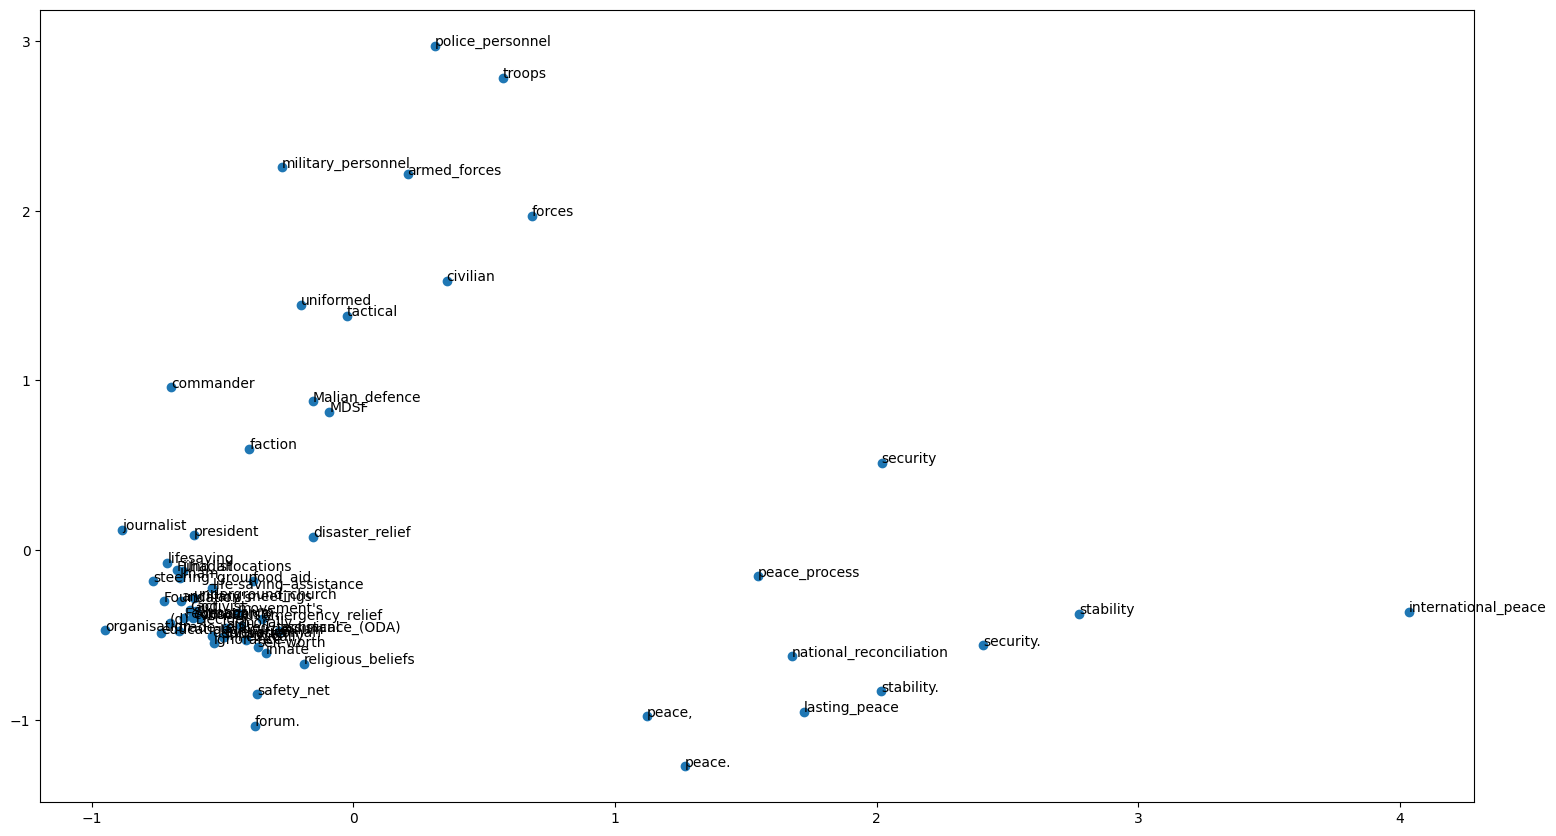

In [ ]:
fig = plt.gcf() 
fig.set_size_inches(18.5,10.5, forward=True) 
fig.set_dpi(100)
plt.scatter(result[:,0],result[:,1]) 
for i, word in enumerate(wordList): 
  plt.annotate(word,xy=(result[i,0],result[i,1])) 
plt.show() 

In [ ]:
#odd word out, different implementation, 5 triplets of words 
print(w2vecModel.wv.doesnt_match(['soldier','entity','civilian']))
print(w2vecModel.wv.doesnt_match(['president','minister','civilian']))
print(w2vecModel.wv.doesnt_match(['stability','peace','person']))
print(w2vecModel.wv.doesnt_match(['religious','uniformed','commander']))
print(w2vecModel.wv.doesnt_match(['peace','faction','military']))


entity
civilian
person
religious
peace


/usr/local/lib/python3.7/dist-packages/gensim/models/keyedvectors.py:895: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


In [ ]:
#Measuring word similarity
print(w2vecModel.wv.similarity('military','war'))
print(w2vecModel.wv.similarity('president','minister'))
print(w2vecModel.wv.similarity('soldier','military'))
print(w2vecModel.wv.similarity('peace','reconciliation'))
print(w2vecModel.wv.similarity('trade','terrorist'))

0.5062064
0.7692626
0.44172525
0.64292955
0.3057351


In [ ]:
#Testing the different analogies (The answers here do not make sense to me)
print(w2vecModel.wv.most_similar(positive=['president','minister'], negative=['person'], topn=3))
print(w2vecModel.wv.most_similar(positive=['soldier','military'], negative=['peace'], topn=3))
print(w2vecModel.wv.most_similar(positive=['jihadist','peace'], negative=['terrorist'], topn=3))

[('Speaker', 0.7619857788085938), ('Chief_Justice', 0.735831618309021), ('Democratic_Party', 0.7344721555709839)]
[('fighter', 0.7014265656471252), ('helicopter', 0.688178539276123), ('gendarmes', 0.6694007515907288)]
[('Guinea-Bissau:', 0.6999896764755249), ('11._Sport', 0.6921194791793823), ('Paralympic', 0.6846829056739807)]


#### Doc2Vec Model UNCorpus 

In [ ]:
import gensim 
import pandas as pd 
#Let's create the tagged document objects to prepare to train the model 
tagged_documents = [gensim.models.doc2vec.TaggedDocument(v,[i]) for i,v in enumerate(df['text'])]

In [ ]:
%%time
d2v_model = gensim.models.Doc2Vec(tagged_documents, vector_size=100,window=5,min_count=2,workers=4)

CPU times: user 20min 1s, sys: 4min 25s, total: 24min 26s
Wall time: 18min 12s


In [ ]:
d2v_model.save('d2v_model')

In [ ]:
words = list(d2v_model.wv.vocab) 
print(len(words))

109913


In [ ]:
d2v_model.wv['organization']

array([-3.8391721e-01, -1.7610401e+00,  1.5171514e+00, -7.4827552e-01,
        2.1956246e+00,  8.0244833e-01, -1.4397054e+00,  1.6186990e+00,
       -6.7208672e-01,  1.3678082e+00, -2.9153609e+00, -2.3110220e+00,
       -3.4504814e+00, -1.4637840e+00, -2.1563210e+00, -1.2299736e+00,
        5.1567411e-01,  3.0368359e+00,  1.1495657e-01,  1.2629765e+00,
       -1.4984066e+00, -1.0935779e+00, -1.0082506e+00, -2.9965923e+00,
       -7.5030732e-01, -9.0429217e-01,  2.5558727e+00, -5.1320654e-01,
       -1.1552876e+00, -2.7113244e-01,  7.7813667e-01,  7.3145849e-01,
       -1.3262092e+00,  1.4018135e-01,  4.0073533e+00,  5.8790017e-02,
       -2.6974571e+00, -1.3980734e+00,  1.2187849e+00,  1.9848828e+00,
       -8.3700031e-01,  1.1658928e+00,  6.4093471e-01,  4.3263158e-01,
       -7.3406380e-01, -7.6528305e-01, -9.0961528e-01,  3.2609587e+00,
       -1.3990841e+00,  3.4078209e+00, -2.5007188e+00,  1.8788868e+00,
        5.0721669e-01,  6.1820984e-01,  7.4880046e-01,  3.0707042e+00,
      

In [ ]:
d2v_model.wv.most_similar('military')

[('civilian', 0.6326255798339844),
 ('naval', 0.6100828051567078),
 ('troops', 0.6089088916778564),
 ('police', 0.5978522300720215),
 ('stationing', 0.5931400060653687),
 ('personnel', 0.5789562463760376),
 ('cargo', 0.5767796039581299),
 ('aircraft', 0.5722975730895996),
 ('aviation', 0.5713708996772766),
 ('tactical', 0.5655825734138489)]

In [ ]:
import numpy as np 
simList = ['organization','military','aid','peace','love','leader']
wordList = [] 
for i in simList: 
  for j in d2v_model.wv.most_similar(i): 
    wordList.append(j[0])
print(wordList)

simVectorList = [] 
for i in wordList: 
  simVectorList.append(d2v_model.wv[i]) 
simVectorArr = np.array(simVectorList) 
print(simVectorArr.shape)

['organizations', 'agency', 'organisation', 'network', 'group', 'body', 'organization.', 'programme', 'committee', 'NGOs', 'civilian', 'naval', 'troops', 'police', 'stationing', 'personnel', 'cargo', 'aircraft', 'aviation', 'tactical', 'assistance', 'assistance.', 'aid.', 'relief', 'shelter', 'services', 'assistance;', 'service', 'support', 'care', 'stability', 'peace.', 'disarmament', 'democracy', 'peace,', 'democratic', 'peacebuilding', 'lasting', 'prosperity', 'political', 'Uneducated', 'Sheikh,', "Abushaala's", 'deprives', 'babies.', 'harms', 'alive.', 'non-Kuwaiti', 'Djaafar', 'perpetuates', 'commander', 'church', 'deputy', 'faction', 'president', 'minister', 'supporters', 'journalist', 'man', 'secretary']
(60, 100)


In [ ]:
from sklearn.decomposition import PCA 
import numpy as np
import matplotlib.pyplot as plt 
pca = PCA(n_components=2) 
result = pca.fit_transform(simVectorArr) 
result

array([[ 7.8106828e+00, -3.9717662e+00],
       [ 1.4785861e+00, -4.5697432e+00],
       [-3.2346168e+00, -6.0849041e-01],
       [ 3.8606977e+00, -4.5234647e+00],
       [ 4.0434699e+00, -8.3761444e+00],
       [ 3.2860892e+00, -6.0780468e+00],
       [-2.6920283e+00, -3.7629873e-01],
       [ 5.6094708e+00, -1.6422058e+00],
       [ 2.4482751e+00, -7.1704588e+00],
       [ 1.0135329e+00, -3.5238621e+00],
       [ 1.4727694e+00, -1.1516122e+00],
       [-3.4524193e+00, -8.8271469e-01],
       [ 1.1403289e+00, -2.8598642e+00],
       [ 3.9791992e+00, -6.1072907e+00],
       [-3.8085096e+00,  8.3855256e-02],
       [ 7.1305723e+00, -6.8614683e+00],
       [-9.9641895e-01, -2.3466847e+00],
       [-4.7210217e-01, -5.2093573e+00],
       [-1.0698472e+00, -1.0091023e+00],
       [-3.1539247e+00, -8.1604975e-01],
       [ 1.5847105e+01,  2.7422874e+00],
       [ 3.8745058e+00,  6.6292042e-01],
       [-2.5352154e+00,  3.0952653e-01],
       [ 3.8726776e+00,  7.6483786e-01],
       [-3.17751

The Doc2Vec model doesn't seem to produce as well of results, but I reckon it is due to the parameters chosen, the window size might need to be changed.

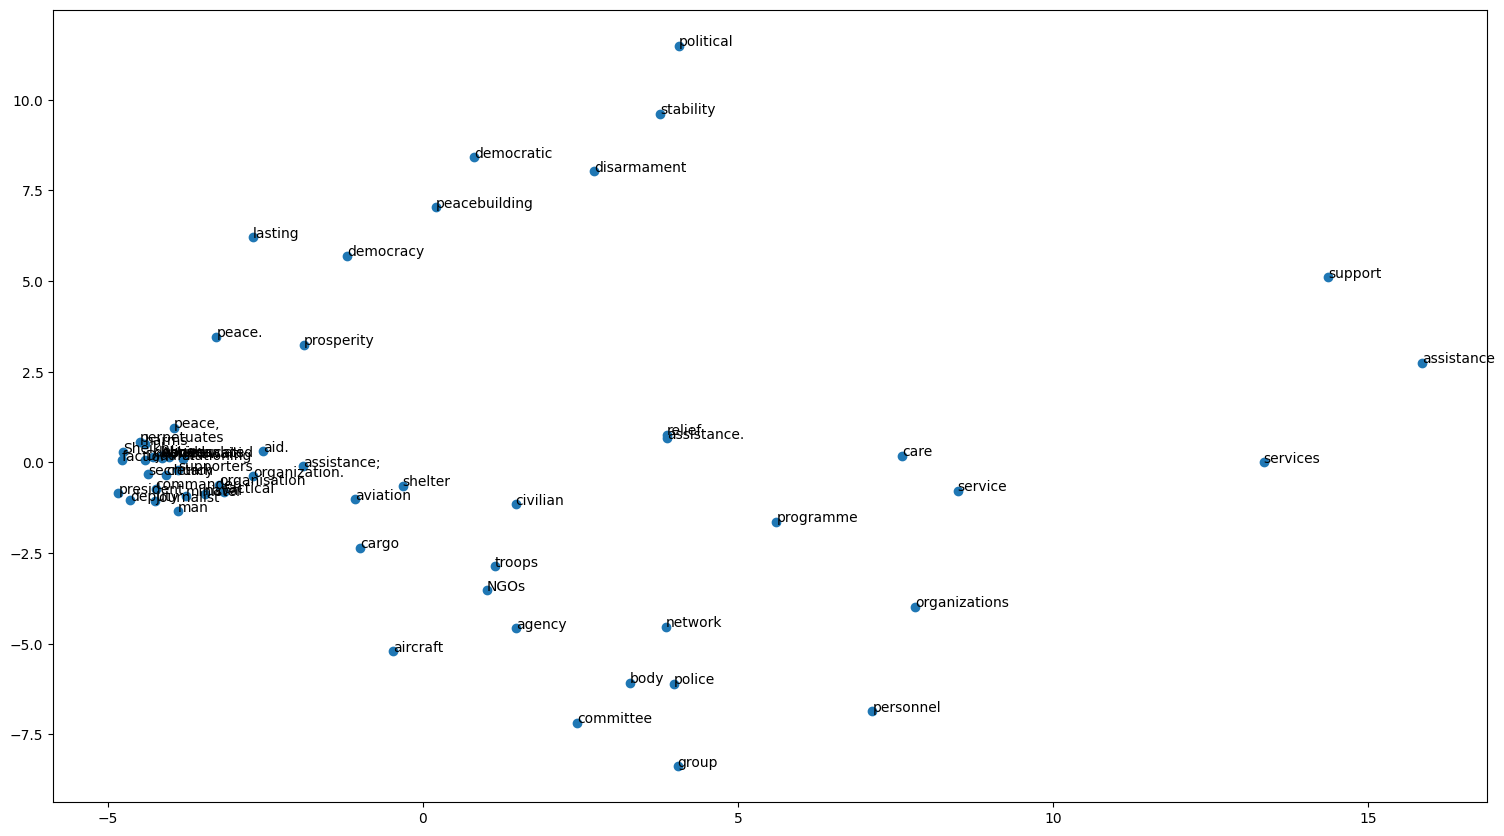

In [ ]:
fig = plt.gcf() 
fig.set_size_inches(18.5,10.5, forward=True) 
fig.set_dpi(100)
plt.scatter(result[:,0],result[:,1]) 
for i, word in enumerate(wordList): 
  plt.annotate(word,xy=(result[i,0],result[i,1])) 
plt.show() 

In [ ]:
#odd word out, different implementation, 5 triplets of words 
print(d2v_model.wv.doesnt_match(['soldier','entity','civilian']))
print(d2v_model.wv.doesnt_match(['president','minister','civilian']))
print(d2v_model.wv.doesnt_match(['stability','peace','person']))
print(d2v_model.wv.doesnt_match(['religious','uniformed','commander']))
print(d2v_model.wv.doesnt_match(['peace','faction','military']))

entity
civilian
person
religious
faction


/usr/local/lib/python3.7/dist-packages/gensim/models/keyedvectors.py:895: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


In [ ]:
#Measuring word similarity
print(d2v_model.wv.similarity('military','war'))
print(d2v_model.wv.similarity('president','minister'))
print(d2v_model.wv.similarity('soldier','military'))
print(d2v_model.wv.similarity('peace','reconciliation'))
print(d2v_model.wv.similarity('trade','terrorist'))

0.4589938
0.7176584
0.27101988
0.48456
0.2848998


In [ ]:
#Testing the different analogies (The answers here do not make sense to me)
print(d2v_model.wv.most_similar(positive=['president','minister'], negative=['person'], topn=3))
print(d2v_model.wv.most_similar(positive=['soldier','military'], negative=['peace'], topn=3))
print(d2v_model.wv.most_similar(positive=['jihadist','peace'], negative=['terrorist'], topn=3))

[('deputy', 0.7457709312438965), ('Speaker', 0.692258894443512), ('Vice-President', 0.6855917572975159)]
[('firing', 0.6628191471099854), ('fighter', 0.6331368684768677), ('commander', 0.6202214360237122)]
[("Mongolia's", 0.5849806666374207), ('nutrition:', 0.5611139535903931), ('interdependence:', 0.551084578037262)]


## Task 5: Arabic UN Corpus Data 
In this task I'm training a Word2Vec and a Doc2Vec model on a subset of the Arabic UN Corpus data, the Arabic UN Corpus is around 2.7GB in size, substantially larger than the English version, I will take a subset of the data as I did with the English version. 

Copying the data from Google Drive and splitting it to fetch a subset for training

In [ ]:
!cp /content/drive/MyDrive/MSc\ Natural\ Language\ Processing\ Colab\ Files\ /UNv1.0.6way.ar.txt /content/

In [ ]:
!wc -l /content/UNv1.0.6way.ar.txt

11365709 /content/UNv1.0.6way.ar.txt


In [ ]:
!split /content/UNv1.0.6way.ar.txt -l 5000000

In [ ]:
import pandas as pd 
readtxt = pd.read_csv(r'/content/xac',names=['text'],on_bad_lines='skip')
readtxt.to_csv('xac.csv',index=None)

In [ ]:
df = pd.read_csv('/content/xac.csv') 
df.shape

(1353050, 1)

In [ ]:
df.head(5)

,text
0,:: يعرض بيان الأداء المالي (البيان الثاني) وال...
1,:: يوضِّح بيان التغيرات في صافي الأصول (البيان...
2,:: يتضمن بيان التدفقات النقدية (البيان الرابع)...
3,:: أُضيفَ البيانُ المتعلق بـمقارنة الميزانية ب...
4,:: يعرض الجدول باء تعديلات الأرصدة الافتتاحية ...


Cleaning and tokenizing the arabic text before training

In [ ]:
#removing the null rows (if available) 
df.dropna() 
df['text'] = df['text'].astype(str) 
df['text']

0          :: يعرض بيان الأداء المالي (البيان الثاني) وال...
1          :: يوضِّح بيان التغيرات في صافي الأصول (البيان...
2          :: يتضمن بيان التدفقات النقدية (البيان الرابع)...
3          :: أُضيفَ البيانُ المتعلق بـمقارنة الميزانية ب...
4          :: يعرض الجدول باء تعديلات الأرصدة الافتتاحية ...
                                 ...                        
1353045    :: تقرير اللجنة الاستشارية لشؤون الإدارة والمي...
1353046    :: جلسة إحاطة حول استراتيجية تعبئة الموارد تكو...
1353047    :: التحليل التجميعي للتقييمات التي أجرتها هيئة...
1353048    :: التقييم المؤسسي لمساهمة هيئة الأمم المتحدة ...
1353049    :: الاستعراض المنهجي المشترك للنتائج المترتبة ...
Name: text, Length: 1353050, dtype: object

In [ ]:
#cleaning all the data 
df['text'] = df['text'].apply(clean_text) 
df.head(20)

,text
0,يعرض بيان الادا المالي البيان الثاني والجدولا...
1,يوضح بيان التغيرات في صافي الاصول البيان الثا...
2,يتضمن بيان التدفقات النقديه البيان الرابع بنو...
3,اضيف البيان المتعلق بمقارنه الميزانيه بالمبال...
4,يعرض الجدول با تعديلات الارصده الافتتاحيه للص...
5,اضيفت الملاحظات التاليه المخزونات الملاحظه وا...
6,الملاحظه
7,تتضمن النقديه ومكافئات النقديه ما يلي
8,صناديق سوق المال
9,الودائع لاجل


In [ ]:
#Tokenizing 
df['text'] = df['text'].str.split() 
df['text']

0          [يعرض, بيان, الادا, المالي, البيان, الثاني, وا...
1          [يوضح, بيان, التغيرات, في, صافي, الاصول, البيا...
2          [يتضمن, بيان, التدفقات, النقديه, البيان, الراب...
3          [اضيف, البيان, المتعلق, بمقارنه, الميزانيه, با...
4          [يعرض, الجدول, با, تعديلات, الارصده, الافتتاحي...
                                 ...                        
1353045    [تقرير, اللجنه, الاستشاريه, لشؤون, الاداره, وا...
1353046    [جلسه, احاطه, حول, استراتيجيه, تعبئه, الموارد,...
1353047    [التحليل, التجميعي, للتقيمات, التي, اجرتها, هي...
1353048    [التقيم, المؤسسي, لمساهمه, هيئه, الامم, المتحد...
1353049    [الاستعراض, المنهجي, المشترك, للنتائج, المترتب...
Name: text, Length: 1353050, dtype: object

In [ ]:
import gensim as gs 
#Feeding the data into a gensim phraser to detect any common phrases (not sure how this is going to work well with Arabic)
phrases = gs.models.phrases.Phrases(df['text'].tolist()) 
phraser = gs.models.phrases.Phraser(phrases) 
trained_phrased = phraser[df['text'].tolist()]

In [ ]:
%%time
w2vecModel = gs.models.Word2Vec(sentences=trained_phrased,sg=1, workers=4)

CPU times: user 32min 23s, sys: 1.74 s, total: 32min 24s
Wall time: 13min 25s


In [ ]:
w2vecModel.save('UNCorpusword2vec')

In [ ]:
words = list(w2vecModel.wv.vocab) 
print(len(words))

205666


The Word2Vec Arabic version is also extremely well performing as we can see

In [ ]:
w2vecModel.wv.most_similar('القوات')

[('قواتها', 0.8294445872306824),
 ('للقوات', 0.7898725867271423),
 ('القوات_العسكريه', 0.7885549068450928),
 ('والقوات', 0.7799293994903564),
 ('قوات', 0.7724869251251221),
 ('الكتائب', 0.7627067565917969),
 ('الوحدات_العسكريه', 0.7583925724029541),
 ('القوات_المسلحه', 0.7453327178955078),
 ('لافريقيا_الوسطي', 0.74307781457901),
 ('القوه', 0.742490291595459)]

In [ ]:
import numpy as np 
simList = ['القوات','الدول','السلام','الشرطي','الامم','المشترك']
wordList = [] 
for i in simList: 
  for j in w2vecModel.wv.most_similar(i): 
    wordList.append(j[0])
print(wordList)

simVectorList = [] 
for i in wordList: 
  simVectorList.append(w2vecModel.wv[i]) 
simVectorArr = np.array(simVectorList) 
print(simVectorArr.shape)

['قواتها', 'للقوات', 'القوات_العسكريه', 'والقوات', 'قوات', 'الكتائب', 'الوحدات_العسكريه', 'القوات_المسلحه', 'لافريقيا_الوسطي', 'القوه', 'الدول_الاعضا', 'للدول', 'الدول_الاطراف', 'البلدان', 'والدول', 'الحكومات', 'دول', 'بالدول', 'دول_المنطقه', 'التي_ترتاد', 'عمليات_حفظ', 'بعثات_حفظ', 'لعمليات_حفظ', 'السلام_والبعثات', 'المتحده_لحفظ', 'وعمليات_حفظ', 'لحفظ_السلام', 'وعددها_وحجمها', 'افراد_حفظ', 'حفظ_السلام', 'التابع_لشرطه', 'وسيواصل_العنصر', 'والاعلامي', 'العنصر_العنصر', 'الحرس', 'الاختصاصيون', 'والعنصر_العسكري', 'ضباط_الاتصال', 'المسؤولين_الرئيسين', 'الهجره_والتجنس', 'والمجتمعات', 'المجتمعات', 'والامم', 'الشعوب', 'كبيرها_وصغيرها', 'للمجتمعات', 'هيوغو_واطار', 'مواجهه_الكوارث', 'علاقات_سلميه', 'التعايش_السلمي', 'يمثل_حصه', 'الخاص_بمكاتب', 'الاستراتيجي', 'المشترك_بين', 'وصندوق_النقديه', 'الموجوده_خارجالمقر', 'وكبير_الوسطا', 'ويشمل_الودائع', 'الاقليمي_لافريقيا', 'كبير_الوسطا']
(60, 100)


In [ ]:
from sklearn.decomposition import PCA 
import numpy as np
import matplotlib.pyplot as plt 
pca = PCA(n_components=2) 
result = pca.fit_transform(simVectorArr) 
result

array([[ 1.2567251 , -0.58025914],
       [ 1.8472962 , -0.9958505 ],
       [ 1.177704  , -0.7764437 ],
       [ 1.007934  , -1.3394201 ],
       [ 1.3246653 , -1.0833608 ],
       [ 0.602424  , -0.7603992 ],
       [ 1.7117962 , -0.3514901 ],
       [ 1.1375087 , -1.2926102 ],
       [ 0.39389566, -1.0213616 ],
       [ 1.5200611 , -0.30650318],
       [-1.1864629 ,  1.3199279 ],
       [-1.747309  ,  1.1554854 ],
       [-1.5997225 ,  1.1512038 ],
       [-1.7989464 ,  0.8942891 ],
       [-1.8680036 ,  1.1511161 ],
       [-1.4512844 ,  0.4116532 ],
       [-1.6911092 ,  0.45406482],
       [-1.94765   ,  0.9363481 ],
       [-1.750094  ,  0.44159693],
       [-1.0993817 ,  0.01869682],
       [ 2.3491259 ,  2.352882  ],
       [ 2.1466093 ,  2.0175683 ],
       [ 2.2705314 ,  1.9300511 ],
       [ 2.06812   ,  1.6639545 ],
       [ 1.9920145 ,  1.1939179 ],
       [ 1.54232   ,  1.351073  ],
       [ 2.0859716 ,  1.9193017 ],
       [-0.07590029, -0.09514911],
       [ 1.7930481 ,

Again, due to Matplotlib not able to view Arabic annotations correctly, the plot is not cleanly presented, but the clusters are easily distiguishable. 

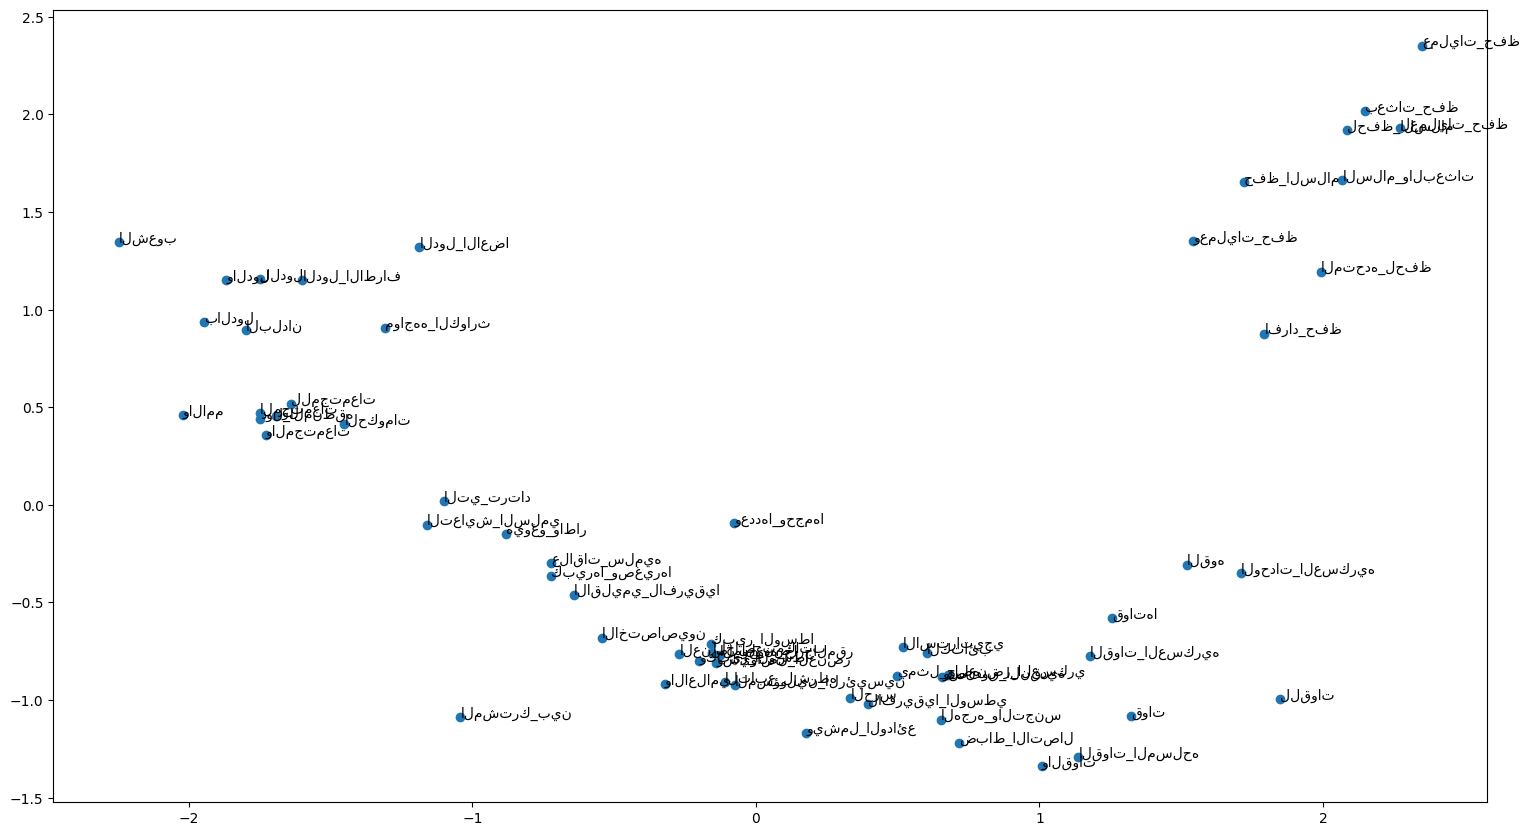

In [ ]:
fig = plt.gcf() 
fig.set_size_inches(18.5,10.5, forward=True) 
fig.set_dpi(100)
plt.scatter(result[:,0],result[:,1]) 
for i, word in enumerate(wordList): 
  plt.annotate(word,xy=(result[i,0],result[i,1])) 
plt.show() 

In [ ]:
#odd word out, different implementation, 5 triplets of words 
print(w2vecModel.wv.doesnt_match(['حب', 'نحل', 'كمين']))
print(w2vecModel.wv.doesnt_match(['نار', 'ملك', 'امير']))
print(w2vecModel.wv.doesnt_match(['حب', 'توزيع', 'ورق']))
print(w2vecModel.wv.doesnt_match(['نار', 'مياه', 'احمر']))
print(w2vecModel.wv.doesnt_match(['اسيا', 'افريقيا', 'جبال']))

كمين
نار
توزيع
مياه
جبال


/usr/local/lib/python3.7/dist-packages/gensim/models/keyedvectors.py:895: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


In [ ]:
#Measuring word similarity
print(w2vecModel.wv.similarity('المسلمين','المصلين'))
print(w2vecModel.wv.similarity('الدين','النار'))
print(w2vecModel.wv.similarity('لطيف','المياه'))
print(w2vecModel.wv.similarity('امير','ملك'))
print(w2vecModel.wv.similarity('ذكر','انثي'))

0.661736
0.23604827
0.29429585
0.60487515
0.40962747


In [ ]:
#Testing the different analogies (The answers here do not make sense to me)
print(w2vecModel.wv.most_similar(positive=["المسلمين", "المصلين"], negative=["ذكر"], topn=3))
print(w2vecModel.wv.most_similar(positive=["ذكر", "انثي"], negative=["ملك"], topn=3))
print(w2vecModel.wv.most_similar(positive=["ذكر", "كلب"], negative=["انثي"], topn=3))

[('والمسيحين', 0.7746180295944214), ('والعرب', 0.7742137908935547), ('والمسلمين', 0.7541797161102295)]
[('اذا_وجد', 0.6154341101646423), ('انهن', 0.585289478302002), ('لاي_سبب', 0.5847126245498657)]
[('ادانوا', 0.6602022051811218), ('قال', 0.654309093952179), ('عثر', 0.6507915258407593)]


### The Doc2Vec Implementation

In [ ]:
import gensim

In [ ]:
tagged_documents = [gensim.models.doc2vec.TaggedDocument(v,[i]) for i,v in enumerate(df['text'])]

In [ ]:
%%time 
d2v_model = gensim.models.Doc2Vec(tagged_documents, vector_size=100,window=5,min_count=2,workers=4)

CPU times: user 30min 13s, sys: 5min 13s, total: 35min 27s
Wall time: 25min 44s


In [ ]:
d2v_model.save("doc2vecModel")

In [ ]:
d2v_model.wv['بحر']

array([-0.11736734,  1.6826655 ,  0.12196133, -0.4907872 ,  0.08014268,
        0.66938716, -1.0066594 , -0.9220642 , -1.311333  , -1.0227972 ,
        0.534178  , -0.7071345 , -0.6373063 , -1.4363232 ,  0.40458715,
        0.29831412,  0.76066864,  2.2007577 , -0.68755937,  1.0337008 ,
       -0.18462288,  0.6594805 ,  0.41219226,  0.25556034, -2.1237595 ,
       -0.43108946, -0.08293893,  1.7267122 , -0.39072907, -1.0804317 ,
        0.31923938,  0.17479229,  0.9795175 , -1.854394  ,  1.3121107 ,
        0.747117  ,  0.21491551, -0.20729493,  2.4107401 , -0.0751616 ,
        0.05470681,  1.3331678 ,  1.3923892 , -1.1353232 , -0.30558848,
       -0.32889152,  0.23116045,  1.9082267 ,  0.0138316 ,  1.3155318 ,
        0.80307806,  0.5021577 , -0.41381985,  1.4615256 ,  0.31644532,
       -1.1671087 ,  1.0324955 , -1.7831111 , -2.3014355 ,  0.37486517,
       -2.3929224 ,  0.5416877 ,  0.28271148, -2.1718104 ,  1.1142241 ,
       -1.3296508 , -0.3048923 , -0.21560773,  1.3081082 ,  0.86

In [ ]:
import numpy as np 
simList = ['حب','محيط','خليج','مسالم','سلاح','جيش']
wordList = [] 
for i in simList: 
  for j in d2v_model.wv.most_similar(i): 
    wordList.append(j[0])
print(wordList)

simVectorList = [] 
for i in wordList: 
  simVectorList.append(d2v_model.wv[i]) 
simVectorArr = np.array(simVectorList) 
print(simVectorArr.shape)

['سلطان', 'النبي', 'حاجي', 'الرسول', 'شريف', 'الجار', 'موسوي', 'ناصر', 'خالد', 'منصور', 'بيت', 'لحم', 'قريه', 'الرقه', 'ضواحي', 'درعا', 'بريف', 'ملكال', 'مزرعه', 'حلب', 'الاستوائيه', 'لخليج', 'بيساو', 'وخليج', 'بحيره', 'دياوارا', 'فونسيكا', 'البنغال', 'غرب', 'حوض', 'حضريصناعي', 'تاريخيان', 'جيشا', 'اوندوري', 'موتابار', 'سوازيلاند', 'اجوف', 'امومي', 'الجدين', 'اوقاف', 'سلاحهم', 'سلاحها', 'سلاحه', 'فتيل', 'وتسريح', 'وتسريحهم', 'خصيتيه', 'ميثلته', 'البرومه', 'لميثان', 'للمقاومه', 'الرب', 'وجيش', 'الجيش', 'الصحابه', 'بالاكا', 'المتمردين', 'التمرد', 'السودانفصيل', 'الاسرائيلي']
(60, 100)


In [ ]:
from sklearn.decomposition import PCA 
import numpy as np
import matplotlib.pyplot as plt 
pca = PCA(n_components=2) 
result = pca.fit_transform(simVectorArr) 
result

array([[-1.648465  ,  0.09177966],
       [-1.6168774 , -0.29481703],
       [-2.115298  , -0.44224712],
       [-2.3897872 , -0.85274345],
       [-1.742727  , -0.1370346 ],
       [-2.4391534 , -1.0836478 ],
       [-2.3427312 , -0.9424842 ],
       [-1.9827143 ,  0.10720997],
       [-1.677094  ,  0.47231233],
       [-1.583428  ,  0.04844712],
       [ 2.1756136 ,  4.7926593 ],
       [-0.1999949 ,  2.2371695 ],
       [ 5.8539767 ,  7.350343  ],
       [ 0.11246563,  1.8622649 ],
       [-0.73016584,  0.81913656],
       [ 0.4971454 ,  2.8208928 ],
       [-1.0018866 ,  0.9982443 ],
       [-0.8525876 ,  0.3021048 ],
       [-0.7504089 ,  0.89275324],
       [ 4.323586  ,  5.900211  ],
       [ 2.4669373 ,  7.3956413 ],
       [-2.4114904 , -0.83167136],
       [ 3.2060485 ,  6.8023725 ],
       [-1.5345552 ,  0.26344714],
       [-0.22452602,  3.2616577 ],
       [-2.491253  , -0.8807566 ],
       [-1.9317868 , -0.20147136],
       [-1.795197  , -0.01545756],
       [ 4.995062  ,

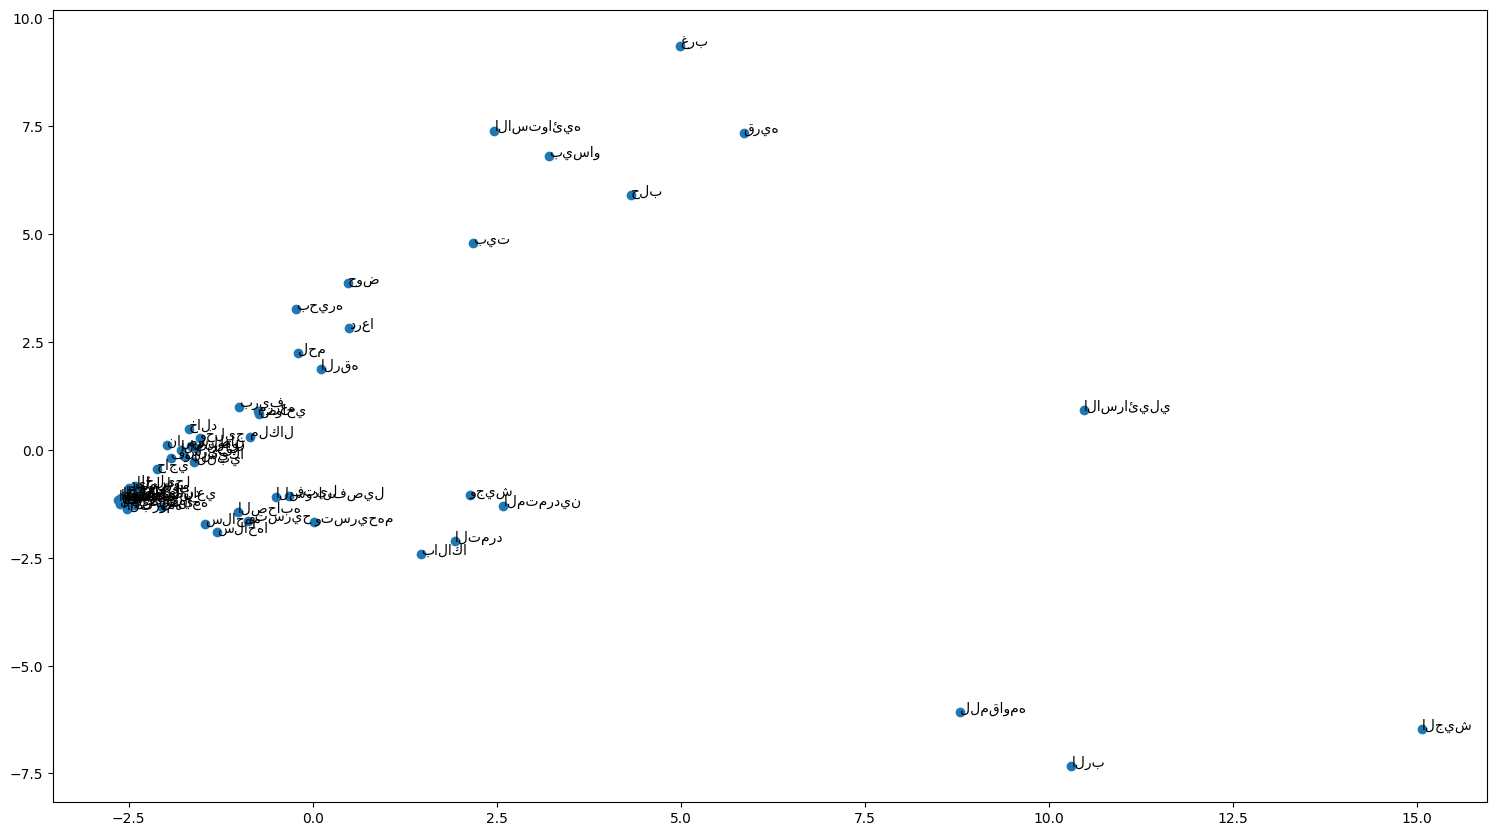

In [ ]:
fig = plt.gcf() 
fig.set_size_inches(18.5,10.5, forward=True) 
fig.set_dpi(100)
plt.scatter(result[:,0],result[:,1]) 
for i, word in enumerate(wordList): 
  plt.annotate(word,xy=(result[i,0],result[i,1])) 
plt.show() 

In [ ]:
#odd word out, different implementation, 5 triplets of words 
print(d2v_model.wv.doesnt_match(['حب', 'نحل', 'كمين']))
print(d2v_model.wv.doesnt_match(['نار', 'ملك', 'امير']))
print(d2v_model.wv.doesnt_match(['حب', 'توزيع', 'ورق']))
print(d2v_model.wv.doesnt_match(['نار', 'مياه', 'احمر']))
print(d2v_model.wv.doesnt_match(['اسيا', 'افريقيا', 'جبال']))

حب
نار
توزيع
مياه
جبال


/usr/local/lib/python3.7/dist-packages/gensim/models/keyedvectors.py:895: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


In [ ]:
#Measuring word similarity
print(d2v_model.wv.similarity('المسلمين','المصلين'))
print(d2v_model.wv.similarity('الدين','النار'))
print(d2v_model.wv.similarity('لطيف','المياه'))
print(d2v_model.wv.similarity('امير','ملك'))
print(d2v_model.wv.similarity('ذكر','انثي'))

0.6130226
0.21760856
-0.21153188
0.7662695
0.07397921


In [ ]:
#Testing the different analogies (The answers here do not make sense to me)
print(d2v_model.wv.most_similar(positive=["المسلمين", "المصلين"], negative=["ذكر"], topn=3))
print(d2v_model.wv.most_similar(positive=["ذكر", "انثي"], negative=["ملك"], topn=3))
print(d2v_model.wv.most_similar(positive=["ذكر", "كلب"], negative=["انثي"], topn=3))

[('المتظاهرين', 0.7434228658676147), ('والعرب', 0.7295985817909241), ('المدنيين', 0.7274632453918457)]
[('خطا', 0.5175228714942932), ('اغفال', 0.4691627025604248), ('اهمال', 0.45255720615386963)]
[('اكد', 0.6181768178939819), ('يناقش', 0.6123132705688477), ('لاحظ', 0.5990405082702637)]


## Time Execution Chart 

1. Google Colab Pro - CPU/High RAM Specifications
  - CPU Used: 4 Core Intel Xeon Processor @ 2.20 GHZ 
  - 25 GBs of RAM 
2. Google Colab Pro - TPU/High RAM Specifications 
  - CPU Used: 20 Core Intel Xeon Processor @ 2.30 GHZ 
  - 35 GBs of RAM 
3. Google Colab Pro - GPU/High RAM Specifications 
  - CPU Used: 4 Core Intel Xeon Processor @ 2.20 GHZ 
  - 25 GBs of RAM


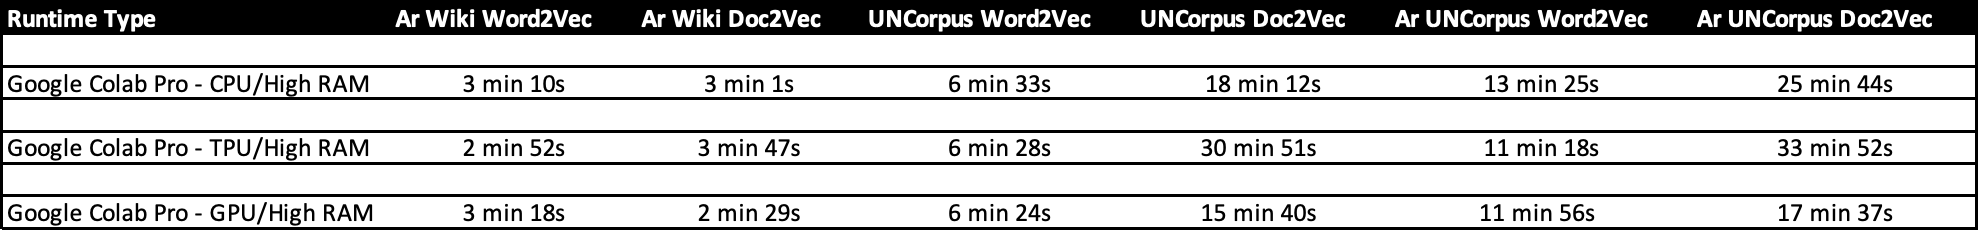